# Classifying Tweets 

---
Creator : DJohnson1313

Date : 10/15/2024

Pace : FLEX

---
## Sources and Links
- Original Dataset : [Brands and Products Emotions](https://data.world/crowdflower/brands-and-product-emotions)
- `CHRISP-DM` explination and image : [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)
- Link to repository : [classifying_tweets](https://github.com/Djohnson1313/classifying_tweets)
- Link to presentation : [nlp_presentation](https://github.com/Djohnson1313/classifying_tweets/blob/main/nlp_presentation.pdf)

---
# Overview

- title
- Sources and Links
- overview
- Imports
   - import necessary libraries
   - download `nltk wordnet`
   - assign data to variable `df`
- business understanding
  - process
    - business objectives
- data understanding
  - data properties
  - data distribution
- methodoligy
  - `CHRISP-DM`
- Functions
    - customized functions used throught the notebook
- exploritory data analysis
- model preperation
    - vectorization
        - count vectorizer
        - tfidf vectorizer
    - lemmatization
- model building and analysis
    - oversampling
        - smote
    - undersampling
        - random under sampler
    - gridsearchcv
    - pipeline
- The Final Model
- Conclusion
    - evaluation
    - review
    - next steps
---

# Imports
Here we import necessary libraries to assist with the modeling process. 

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
confusion_matrix, ConfusionMatrixDisplay,
precision_score, recall_score, 
accuracy_score, f1_score)
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

In [2]:
# this cell only needs to be ran the first time wordnet is used
#nltk.download('wordnet')

In [3]:
# this cell here just allows us to access the data without having to type the title every time.
df = pd.read_csv('tweet_sentiment_records.csv', encoding = 'latin-1')

---
# Business Understanding

The purpose of the following notebook is so a corporation (Google or Apple in this case) can categorize and evaluate customer sentiment of their products. Using Natural Language Processing (NLP), we can do so through stratigies such as `vectorizing`, `lemmatizing`, and modeling using `MultinomialNB`. This will allow the corporations to begin to adjust the products they make to suit their audiance better, or create new and innovative products in the future that will satisfy their customer base.

- Business Objectives
    - classify tweets based on sentiment
        - success includes correctly classifying a majority of tweets
- Situation Assesment
    - resources available
        - data frame containing tweet context as well as who its directed too and the overall sentiment of the tweet
    - resources unavailable
        - data on who the actual tweet is from
- Data mining goals
    - asses and unserstand the data provided
- project plan
    - produce a usable and reliable classification model given the accessable informationble informationble informationble information

---
# Data Understanding 
The data we have here is a dataset from CrowdFlower via data.world. This data was hand classified by humans to create a dataset designed for NLP. 

the data is as follows:

- Data Properties :
    - the original dataset contains 9093 rows, with each row representing a tweet
    - the original dataset contains 3 columns, with the columns being :
        - tweet_text
        - emotion_in_tweet_is_directed_at
        - is_there_an_emotion_directed_at_a_brand_or_product
            - all 3 of these columns will have their names changed due to how long they are
         
Let's take a quick look into the data we have access to, and do some small changes to make it easier to read.

In [4]:
df.head() # display first 5 rows from df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
# this cell here renames specified columns to what we want, in this case a shorter name.
df = df.rename(columns = {'tweet_text' : 'tweet', 
                          'emotion_in_tweet_is_directed_at': 'directed_to', 
                          'is_there_an_emotion_directed_at_a_brand_or_product' : 'emotion'})

In [6]:
df.head()

,tweet,directed_to,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
df['tweet'][4] # preview specified tweet

"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)"

In [8]:
df.shape # this cell here tells us how many rows we have (9093) and how many columns we have (3) in the original dataframe

(9093, 3)

In [9]:
df.info() # this cell here shows us the data type of our data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        9092 non-null   object
 1   directed_to  3291 non-null   object
 2   emotion      9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


## Data Distribution

<div>
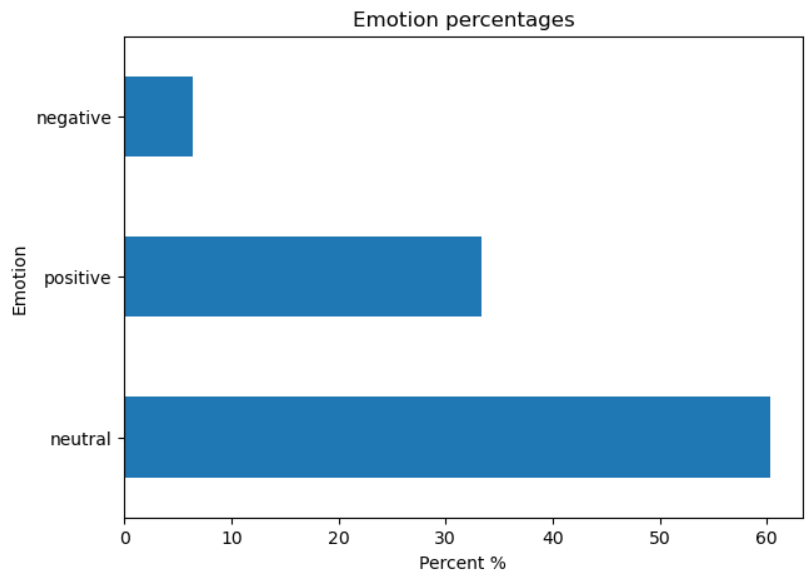
</div>

Here we can see thet distribution of our data, with neutral having a large lead on the other 2 emotions. This will have to be addressed later. For now, this data is fine for exploritory data analysis, and we will see more distributions of the data shortly.  

# Data Preparation
To begin a Natural Language Processing (NLP) Model, there are several steps required including lemmatization and vectorization. This is done to prepare the data to be able to properly be utilized by the modeling process. Without these steps, the model libraries will most likely return an error, as the model doesnt understand words itself. The purpose of lemmatization is to allow similar words (i.e. ran and run) to count as the same word, as they still mean the same thing in most cases. This is done through finding the root rood for every word, and summing the counts of them all together. 

- lemmatize
    - reduce words to their base form.
      - example : faster -> fast
- vectorize
    - turn words into numbers so the model can understand it


In [10]:
df['emotion'].value_counts() # lets take a look at the counts of the emotion tags

emotion
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [11]:
df[df['emotion'] == "I can't tell"] # this cell here shows us the tweets associated with the 'i cant tell' tag. I think its best to 
# re-label these as unknown

,tweet,directed_to,emotion
90,Thanks to @mention for publishing the news of ...,NaN,I can't tell
102,ÛÏ@mention &quot;Apple has opened a pop-up st...,NaN,I can't tell
237,Just what America needs. RT @mention Google to...,NaN,I can't tell
341,The queue at the Apple Store in Austin is FOUR...,NaN,I can't tell
368,Hope it's better than wave RT @mention Buzz is...,NaN,I can't tell
...,...,...,...
9020,It's funny watching a room full of people hold...,NaN,I can't tell
9032,"@mention yeah, we have @mention , Google has n...",NaN,I can't tell
9037,"@mention Yes, the Google presentation was not ...",NaN,I can't tell
9058,&quot;Do you know what Apple is really good at...,NaN,I can't tell


In [12]:
# this cell here re-lables all emotions to a single word
df['emotion'] = df['emotion'].replace({"I can't tell" : 'unk',
                                       "No emotion toward brand or product" : "neutral",
                                      'Positive emotion' : 'positive',
                                      'Negative emotion' : 'negative'}) 

In [13]:
# proof of above cell block
df['emotion'].value_counts()

emotion
neutral     5389
positive    2978
negative     570
unk          156
Name: count, dtype: int64

## Methodoligy

A common methodology used when attempting to create a model is CRISP-DM, which stands for:

- `CR`oss
- `I`ndustry
- `S`tandard
- `P`rocess
- (for)
- `D`ata
- `M`ining

A good visual for how this works is a model designed by [IBM](https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview)
<div>
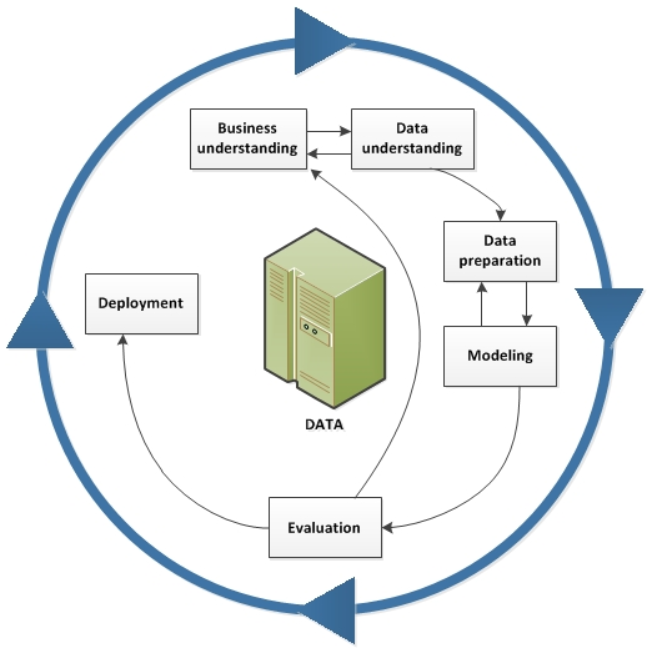
</div>
This methodolgy is an overarhcing workflow style, where upon completing a step in the cycle, the next step is started and so on. Where this model really helps though is that its not linear, meaning if needed, returning to a previous step can assist with assuring a thorough and complete modeling process.

# Functions
Here we create some handmade functions to assist with repetitive code blocks. If a code block / section uses a handmade function, there will be a note indicating which one and its purpose.

In [14]:
def word_count(row):
    '''
    splits words individualy and counts the total amount of words in a given row.
    if used with .apply(word_count) can be used on an entire dataframe.

    requirements : the row(s) the function is acting upon needs to be dtype(object)
    '''
    
    return len(str(row).split())

In [15]:
def avg_word_count_per_emotion(emotion):
    '''
    counts the total amout of words in a specified emotion field, 
    as well as returns the average per tweet for the specified emotion field.

    requirements : the row(s) the function is acting upon needs to be dtype(object)
    '''
    
    em = emotion
    df_ = df[df['emotion'] == emotion]
    total = len(df_['word_count'])
    count = sum(df_['word_count'])
    avg = round(count / total)
    return (f'{emotion} emotion tweets have a total of {total} words, with an avg of {avg} words per tweet')

In [16]:
def remove_stopwords(token_list):
    '''
    uses list comprehension to remove stopwords from a given list.
    requires stopwords_list to be created before hand.
    if used with .apply(remove_stopwords) can be used on en entire dataframe.
    
    requirement : the row(s) the function is acting upon needs to be dtype(object)
    '''
    
    stopwords_removed = [w for w in token_list if w not in stopwords_list]
    return stopwords_removed

In [17]:
def lem_col(col):
    '''
    uses list comprehension to lemmatize a given column.
    if used with .apply(lem_col) can be used on enitre dataframe.
    
    requirement : the columns(s) the function is acting upon needs to be dtype(object)
    '''
    
    return [lem.lemmatize(w) for w in col]

In [18]:
def get_metrics(y_train, pred):
    '''
    bundles together accuracy, precision, recall and f1 score into one function.
    
    requirements : this function requires 2 inputs, the y_values as dtype(object) and pred as dtype(numpy.ndarry)
    '''   
    
    acc = accuracy_score(y_train, pred)
    prec = precision_score(y_train, pred, average = 'macro', zero_division = np.nan)
    rec = recall_score(y_train, pred, average = 'macro')
    f1 = f1_score(y_train, pred, average = 'macro')
    print('accuracy:', acc)
    print('precision:', prec)
    print('recall:', rec)
    print('f1 score:', f1)

# Exploritory Data Analysis
Lets dive more into the data we have, and se if we can get a base understanding of what we're working with. This step assists us with the modeling phase, as it allows us to have a deeper understanding of what the results may look like.

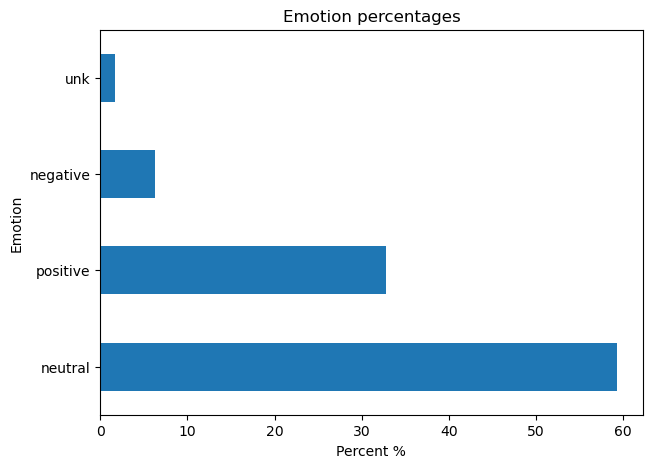

In [19]:
fig, ax = plt.subplots(figsize = (7,5)) # create figure
emotion_bar = df['emotion'].value_counts(normalize=True) * 100 # assign what values to count
emotion_bar.plot(kind='barh') # type of graph
ax.set_xlabel('Percent %') # label x axis
ax.set_ylabel('Emotion') # label x axis
ax.set_title('Emotion percentages') # title
plt.show(); # output

In [20]:
# here we see how man tweets are directed at what product / company
df['directed_to'].value_counts()

directed_to
iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: count, dtype: int64

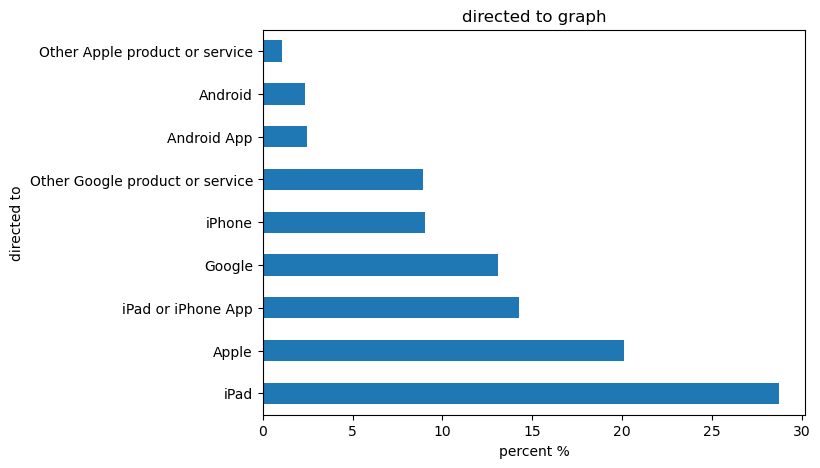

In [21]:
fig, ax = plt.subplots(figsize = (7,5)) # create figure
direction_bar = df['directed_to'].value_counts(normalize=True) * 100 # assign what values to count
direction_bar.plot(kind='barh') # type of graph
ax.set_xlabel('percent %') # label x axis
ax.set_ylabel('directed to') # label y axis
ax.set_title('directed to graph') # title
plt.show(); # output

Here we can see Apple and Apple products are 4 of the top 5 directed to. This graph doesnt specify if its negative or positive, so being 4 of the top five doesnt mean anything specific. Just that a lot of people are talking about Apple - which is probably what they want.

In [22]:
df['tweet'][0] # preview specified tweet

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [23]:
len(df['tweet'][0].split()) # this code counts the amount of words in a tweet

23

In [24]:
df.loc[6] # here we identified row with a null tweet. it needs to be removed

tweet              NaN
directed_to        NaN
emotion        neutral
Name: 6, dtype: object

In [25]:
df['tweet'].isna().value_counts() # show that the above row is the only null tweet

tweet
False    9092
True        1
Name: count, dtype: int64

In [26]:
df = df.drop(6, axis = 0) # remove null tweet

Lets create a column for word count, so its easier to create some visualizations.

function used : 
- `word_count`
    - splits words individualy and counts the total amount of words in a given row

In [27]:
df['word_count'] = df['tweet'].apply(word_count) # apply a custom function to the dataframe to get word counts for each row

In [28]:
df.head()

,tweet,directed_to,emotion,word_count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,23
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,22
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,15
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,17


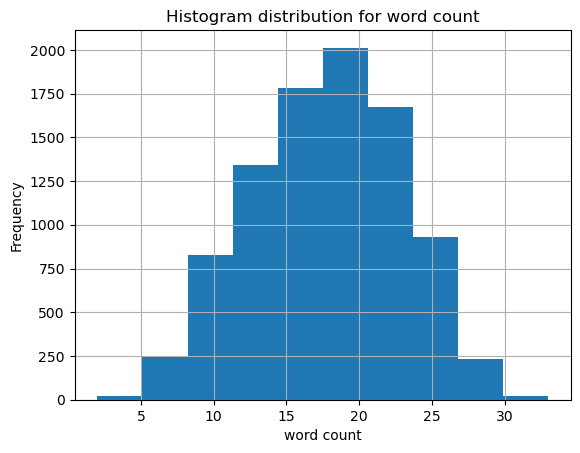

In [29]:
hist = df['word_count'].hist(bins = 10) # create plot
plt.title('Histogram distribution for word count') # title
plt.xlabel('word count') # label x axis
plt.ylabel('Frequency') # label y axis
plt.show(); # output

Here we can see that most tweets contain around 15 - 20 words

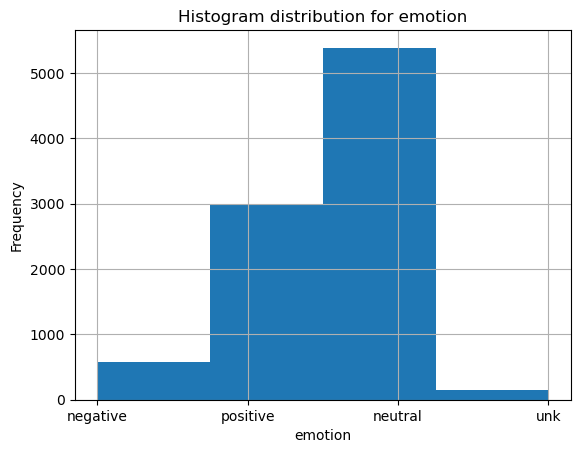

In [30]:
hist = df['emotion'].hist(bins = 4) # create plot
plt.title('Histogram distribution for emotion') # title
plt.xlabel('emotion') # label x axis
plt.ylabel('Frequency') # label y axis
plt.show(); # output

And that neutral (as shown in data distribution) has the highest amount of associated tweets.

Next lets look into the average word count of a given emotion field.

function used : 
- `avg_word_count_per_emotion`
    - counts the total amout of words in a specified emotion field, as well as returns the average per tweet for the specified emotion field

In [31]:
avg_word_count_per_emotion('negative')

'negative emotion tweets have a total of 570 words, with an avg of 19 words per tweet'

In [32]:
avg_word_count_per_emotion('positive')

'positive emotion tweets have a total of 2978 words, with an avg of 18 words per tweet'

In [33]:
avg_word_count_per_emotion('neutral')

'neutral emotion tweets have a total of 5388 words, with an avg of 17 words per tweet'

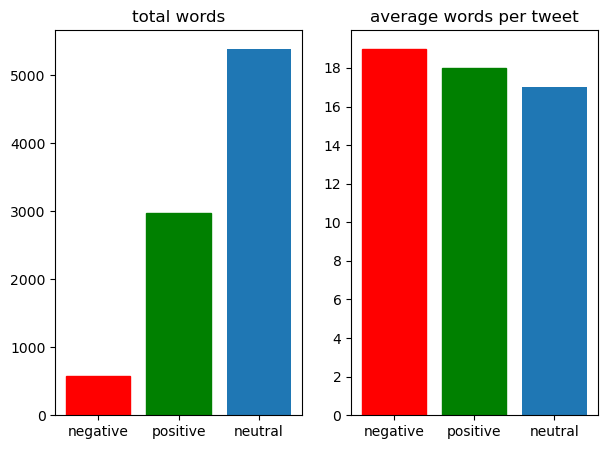

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (7,5)) # create figure

lables_0 = ['negative', 'positive', 'neutral'] # create labels
bar_0 = ax[0].bar(x = range(3),height = [570, 2978, 5388], tick_label = lables_0) # create graph on the left
ax[0].set_title('total words') # title
bar_0[0].set_color('r') # alter colors
bar_0[1].set_color('g') # alter colors

labels_1 = ['negative', 'positive', 'neutral'] # create labels
bar_1 = ax[1].bar(x = range(3), height = [19, 18, 17], tick_label = labels_1) # create graph on the right
ax[1].set_title('average words per tweet') # title
plt.locator_params(axis = 'y', nbins = 10) # adjusts the numbers shown on right graph
bar_1[0].set_color('r') # alters colors 
bar_1[1].set_color('g') # alters colors
plt.show(); # output

Here we can see that while negative has the lowest amount of associated tweets, it actually has the highest word count, showing a bit of a trend where neutral tweets say the least, positive tweets say a little more, and negtive tweets say the most. 

# Model Preparation

Lets move on to data preperation. Here we will show the the process and effects of what needs to be done for the modeling process to function properly. Later we will use a pipeline and gridsearch which conceals this process, so its good to get a basic understanding of whats happening now.

For modeling, `MultinomialNB` was chosen, simply do to the fact it works very well for NLP, and its simple to use. To fine tune the model, perameters before the modeling took place were altered, primarily `max_features`. This can drastically change the output of the model as it alters the amount of features the model is allowed to use. Some other perameters that were altered where oversampling and undersampling. This was done through `SMOTE` and `RandomUnderSampler`. These techniques are used due to the fact the original dataset is unbalanced, meaning a specifc feature (example : negative sentiment) has significantly less associated rows than neutral. This can cause issues with the modeling process, causing it to not predict information that well.

- `SMOTE`
    - creates data where data is laking
- `RandomUnderSampler`
    - reduces data for a feature with more data then the rest
- model
    - utilizing `MultinomialNB`, a library that models the given data for usor us

In [35]:
df = df[df['emotion'] != 'unk'] # remove rows with the 'unk' tag for emotion

In [36]:
df['emotion'].value_counts() # proof of above cell

emotion
neutral     5388
positive    2978
negative     570
Name: count, dtype: int64

In [37]:
df['tweet'][0] # preview specified tweet

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [38]:
stopwords_list = stopwords.words('english') # create stopwords list

In [39]:
stopwords_list += list(string.punctuation) # add punctuation to list

In [40]:
stopwords_list # show the words contained in stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
df['tweet'] = df['tweet'].str.lower() # lowercase all tweets

In [42]:
token_test = word_tokenize(df['tweet'][0]) # test out tokenization

In [43]:
stopped_words_test = [w.lower() for w in token_test if w not in stopwords_list] # test stopwords
stopped_words_test

['wesley83',
 '3g',
 'iphone',
 '3',
 'hrs',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw']

In [44]:
df.head()

,tweet,directed_to,emotion,word_count
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,23
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,22
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,15
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,15
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,17


In [45]:
# `RegexpTokenizer` can tokenize and remove stopwords in a single function
tweet_example = df['tweet'][0]
basic_token_pattern = r"(?u)\b\w\w+\b"
tokenizer = RegexpTokenizer(basic_token_pattern)
tokenizer.tokenize(tweet_example)

['wesley83',
 'have',
 '3g',
 'iphone',
 'after',
 'hrs',
 'tweeting',
 'at',
 'rise_austin',
 'it',
 'was',
 'dead',
 'need',
 'to',
 'upgrade',
 'plugin',
 'stations',
 'at',
 'sxsw']

In [46]:
df['tweet'][0].split() # show that stopwords have been removed compared to above

['.@wesley83',
 'i',
 'have',
 'a',
 '3g',
 'iphone.',
 'after',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#rise_austin,',
 'it',
 'was',
 'dead!',
 'i',
 'need',
 'to',
 'upgrade.',
 'plugin',
 'stations',
 'at',
 '#sxsw.']

In [47]:
token_list = df['tweet'].apply(tokenizer.tokenize) # tokenize and remove stopwords for entire dataframe

In [48]:
token_list # show tokenized data

0       [wesley83, have, 3g, iphone, after, hrs, tweet...
1       [jessedee, know, about, fludapp, awesome, ipad...
2       [swonderlin, can, not, wait, for, ipad, also, ...
3       [sxsw, hope, this, year, festival, isn, as, cr...
4       [sxtxstate, great, stuff, on, fri, sxsw, maris...
                              ...                        
9088                       [ipad, everywhere, sxsw, link]
9089    [wave, buzz, rt, mention, we, interrupt, your,...
9090    [google, zeiger, physician, never, reported, p...
9091    [some, verizon, iphone, customers, complained,...
9092    [ïà, ü_, ââ, â_, ûârt, mention, google, tests,...
Name: tweet, Length: 8936, dtype: object

In [49]:
df['stopwords_removed'] = token_list.apply(remove_stopwords) # create a new column of tweets without stopwords

In [50]:
df['stopwords_removed'][0] # proof of above code

['wesley83',
 '3g',
 'iphone',
 'hrs',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw']

In [51]:
df.head()

,tweet,directed_to,emotion,word_count,stopwords_removed
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,23,"[wesley83, 3g, iphone, hrs, tweeting, rise_aus..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,22,"[jessedee, know, fludapp, awesome, ipad, iphon..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,15,"[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,15,"[sxsw, hope, year, festival, crashy, year, iph..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,17,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


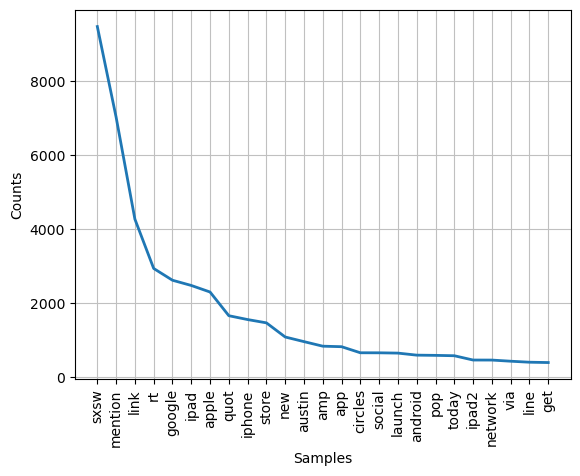

In [52]:
fdist = FreqDist(df['stopwords_removed'].explode()) # create plot
fdist.plot(25) # plot
plt.show(); # output

Here we see the distribution of words remaining after stopwords have been removed, with sxsw being the top. Sxsw is a sort of film festival.

To begin a Natural Language Processing (NLP) Model, there are several steps required including lemmatization and vectorization. This is done to prepare the data to be able to properly be utilized by the modeling process. Without these steps, the model libraries will most likely return an error, as the model doesnt understand words itself. The purpose of lemmatization is to allow similar words (i.e. ran and run) to count as the same word, as they still mean the same thing in most cases. This is done through finding the root rood for every word, and summing the counts of them all together. 

- lemmatize
    - reduce words to their base form.
      - example : faster -> fast
- vectorize
    - turn words into numbers so the model can understand it

In [53]:
lem = WordNetLemmatizer() # assign `WordnetLemmatizer` to variable

In [54]:
lem.lemmatize('feet') # proof of concept

'foot'

function used :
- `lem_col`
    - uses list comprehension to lemmatize a given column.

In [55]:
df['text_lemmatized'] = df['stopwords_removed'].apply(lem_col) # utilize custom function to create a new column with lemmatized tweets

In [56]:
df['text_lemmatized'][0] # proof of above code

['wesley83',
 '3g',
 'iphone',
 'hr',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'station',
 'sxsw']

In [57]:
df['stopwords_removed'][0] # comparison before lemmatization. notice the word 'stations' towards the end of each cell

['wesley83',
 '3g',
 'iphone',
 'hrs',
 'tweeting',
 'rise_austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'sxsw']

In [58]:
df.head()

,tweet,directed_to,emotion,word_count,stopwords_removed,text_lemmatized
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,23,"[wesley83, 3g, iphone, hrs, tweeting, rise_aus...","[wesley83, 3g, iphone, hr, tweeting, rise_aust..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,22,"[jessedee, know, fludapp, awesome, ipad, iphon...","[jessedee, know, fludapp, awesome, ipad, iphon..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,15,"[swonderlin, wait, ipad, also, sale, sxsw]","[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,15,"[sxsw, hope, year, festival, crashy, year, iph...","[sxsw, hope, year, festival, crashy, year, iph..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,17,"[sxtxstate, great, stuff, fri, sxsw, marissa, ...","[sxtxstate, great, stuff, fri, sxsw, marissa, ..."


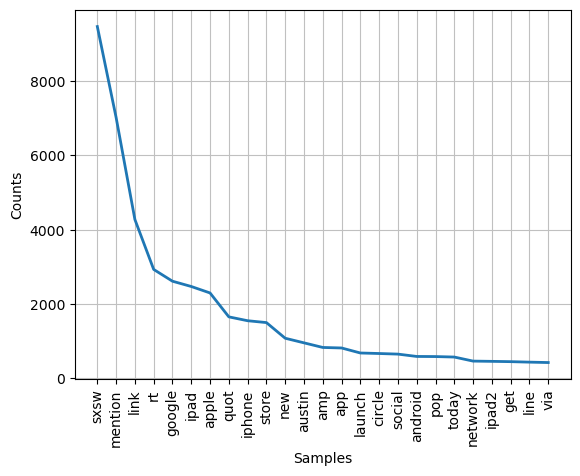

In [59]:
fdist = FreqDist(df['text_lemmatized'].explode()) # create plot
fdist.plot(25) # plot
plt.show(); # output

Here we see another distribution of words after being lemmatized. Lemmatization did not effect the top words by frequency much.

## Count Vectorizer
Here we use `CountVectorizer` to essentialy count the amout of times a word shows up. this is needed for the modeling process. 

In [60]:
vec = CountVectorizer(lowercase = False) # assign `CountVectorizer` to variable

In [61]:
flat_df = [' '.join(doc) for doc in df['text_lemmatized']] # this cell flattens the given column. essentialy it places all data into one big collection.
# this will be used several times throught the notebook

In [62]:
vec1 = vec.fit_transform(flat_df) # use vectorizer on data

In [63]:
df_vectorized = pd.DataFrame(vec1.toarray(), columns = vec.get_feature_names_out()) # create visual of vectorized data

In [64]:
df_vectorized.head()

,00,000,00am,00pm,01am,02,03,0310apple,06,08,...,ûò,ûòand,ûó,ûócan,ûójust,ûólewis,ûólots,ûómy,ûóthe,ü_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TFIDF Vectorizer
`TfifdVectorizer` does the same this as a standard vectorizer, except it shows the relative importance of a word compared to other words. The dataframe output below shows just zeros for everything, but it does contain every word used in the data. We will use `TfidfVectorizer` for our model, as it gives it a little more information. 

In [65]:
tf = TfidfVectorizer(lowercase = False) # assign `TfidfVectorizer` to variable

In [66]:
flat_df_tf = [' '.join(doc) for doc in df['text_lemmatized']] # flatten data

In [67]:
tf_vector = tf.fit_transform(flat_df_tf) # use vectorizer

In [68]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tf_vector, columns = tf.get_feature_names_out()) # create visual of vectorized data

In [69]:
tfidf_df.head()

,00,000,00am,00pm,01am,02,03,0310apple,06,08,...,ûò,ûòand,ûó,ûócan,ûójust,ûólewis,ûólots,ûómy,ûóthe,ü_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling
Here we get into the actual modeling of the data. We will use `MultinomialNB` as our modeler, as its really simple to use and works very well for what we are trying to accomplish. First we use `train_test_split` to slit our data into training and testing groups. This allows us to train the model on thrain data, then use it on test data, without the test data ever being effected by the train data. After training the data, we fit it and make predictions with it. This give us several metrics we can use to determine how well the model performed. This technique is used throught the modeling process.

In [70]:
seed = 13 # create a seed so that the random state is always the same
y = df['emotion'] # assign target variable
x = df.drop('emotion', axis = 1) # assign features
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.5) # split data into train and test groups

In [71]:
tf_1 = TfidfVectorizer(lowercase = False, max_features = 100) # assign `TfidfVectorizer` to variable with 100 max features

In [72]:
flat_df_tf_xt = [' '.join(doc) for doc in x_train['text_lemmatized']] # flatten data

In [73]:
flat_df_tf_xt[0 : 10] # show what a flattened column looks like

['well cashmore gave new ipad crushing non endorsement sxsw checkins ouch',
 'technews ipad get temporary apple store sxsw link tech_news apple apple_store ipad_2 sxsw tech',
 'knitted staircase attendance sxsw party tomo 7pm hosted mention amp mention link',
 'rt mention us google tv room nobody raise hand packed room socialviewing session sxsw',
 'rt mention well hello sxsw free mention sampler celebrate festival year including barton hollow link',
 'within hour buying ipad glenda watson hyatt cerebral palsy able communicate stranger public sxsw poursite',
 'fail whale artist mention living ipad sxsw link',
 'know selling weve never talked hate product rt mention check heyo iphone sxsw sxswi',
 'anyone else using hashable network sxsw week trying android version',
 'rt mention reason 19 keep parakeet employed link keep track lady sxsw link mention']

In [74]:
tf_vector_xt = tf_1.fit_transform(flat_df_tf_xt) # use vectorizer

In [75]:
baseline_model = MultinomialNB() # assign `MultinomialNB` to variable

In [76]:
baseline_cv = cross_val_score(baseline_model, tf_vector_xt, y_train) # score the data using cross validation

In [77]:
baseline_cv # output of above cell

array([0.62080537, 0.61185682, 0.63310962, 0.63269877, 0.62933931])

In [78]:
baseline_model.fit(tf_vector_xt, y_train) # fit the model on the data

MultinomialNB()

In [79]:
pred_1 = baseline_model.predict(tf_vector_xt) # make predictions 

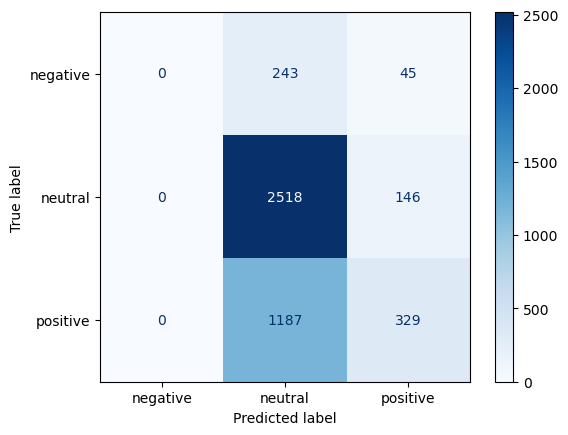

In [80]:
cnf_matrix = confusion_matrix(y_train, pred_1) # assign what to use in plot
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=baseline_model.classes_) # create plot
disp.plot(cmap=plt.cm.Blues) # output

function used : 
- `get_metrics`
    - bundles together accuracy, precision, recall and f1 score into one function.

In [81]:
get_metrics(y_train, pred_1) # use custom function to get metrics

accuracy: 0.6371978513876455
precision: 0.6352417972098823
recall: 0.38740455495072906
f1 score: 0.36160940141379355


## Smote
Due to the class imbalance of our data, we will have to try to balance the data ourselves. The first technique we will try is `SMOTE` or :

- `S`ynthetic
- `M`inority
- `O`versampling
- `TE`chnique

This technique creates faux data for the minority class, meaning it essentially creates fake data for the training of a model.

In [82]:
sm = SMOTE(random_state = seed) # assign `SMOTE` to variable

In [83]:
x_smote, y_smote = sm.fit_resample(tf_vector_xt, y_train) # use smote on trai data

In [84]:
y_smote.value_counts() # proof of `SMOTE` working 

emotion
negative    2664
positive    2664
neutral     2664
Name: count, dtype: int64

In [85]:
y_train.value_counts() #  before `SMOTE`

emotion
neutral     2664
positive    1516
negative     288
Name: count, dtype: int64

In [86]:
baseline_model_smote = MultinomialNB() # asssign `MultinomialNB` to variable
baseline_cv_smote = cross_val_score(baseline_model_smote, x_smote, y_smote) # get cross validation scores

In [87]:
baseline_cv_smote 

array([0.54158849, 0.56535335, 0.55256571, 0.55819775, 0.56007509])

In [88]:
baseline_model_smote.fit(x_smote, y_smote) # use `SMOTE` data with model

MultinomialNB()

In [89]:
pred_smote = baseline_model_smote.predict(x_smote) # make predictions with `SMOTE` data

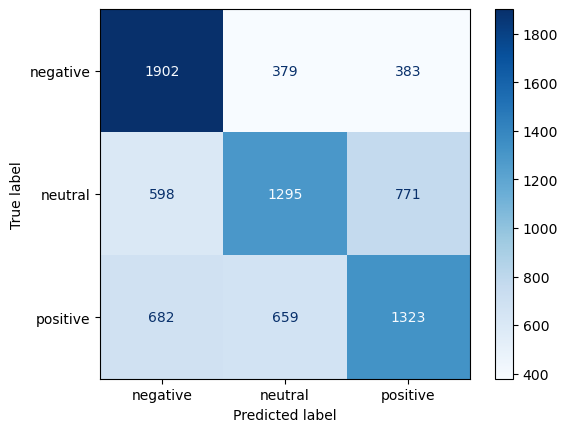

In [90]:
cnf_matrix_smote = confusion_matrix(y_smote, pred_smote) # assign what to use in plot
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_smote, display_labels=baseline_model_smote.classes_) # create plot
disp_smote.plot(cmap=plt.cm.Blues) # output

In [91]:
get_metrics(y_smote, pred_smote) # custom function

accuracy: 0.5655655655655656
precision: 0.562310138864785
recall: 0.5655655655655655
f1 score: 0.5612327265399771


## Smote 2.0
In the above model, we allowed `SMOTE` to match the minority class to the majority classs. While this gave us goof information on how it performed, This is usually not recommended. In the next `SMOTE` test, we will only be doubling each minority class, and leaving the majority class alone.

In [92]:
samp_strat = {'neutral': 4018, 'positive' : 4018, 'negative' : 880} # assign how much `SMOTE` should oversample
sm_2 = SMOTE(random_state = seed, sampling_strategy = samp_strat)

In [93]:
x_smote_2, y_smote_2 = sm_2.fit_resample(tf_vector_xt, y_train) # use `SMOTE` on data

In [94]:
y_smote_2.value_counts() # proof of `SMOTE` working

emotion
positive    4018
neutral     4018
negative     880
Name: count, dtype: int64

In [95]:
y_train.value_counts() # compare to above cell

emotion
neutral     2664
positive    1516
negative     288
Name: count, dtype: int64

In [96]:
baseline_model_smote_2 = MultinomialNB() # assign `MultinomialNB` to variable
baseline_cv_smote_2 = cross_val_score(baseline_model_smote_2, x_smote_2, y_smote_2) # create cross val scores

In [97]:
baseline_cv_smote_2 # cross val score

array([0.56502242, 0.56870443, 0.57992148, 0.56870443, 0.57767807])

In [98]:
baseline_model_smote_2.fit(x_smote_2, y_smote_2) # use model with new `SMOTE` data

MultinomialNB()

In [99]:
pred_smote_2 = baseline_model_smote_2.predict(x_smote_2) # make predictions

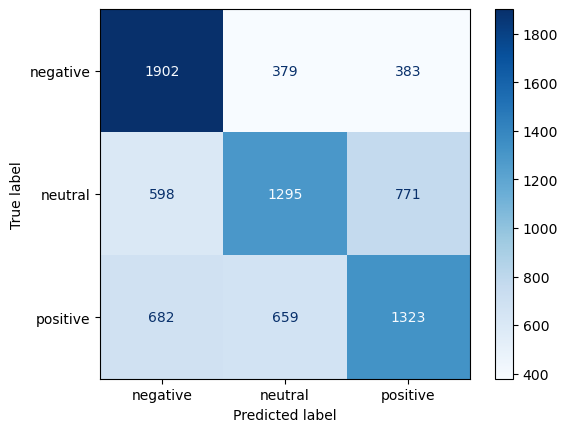

In [100]:
cnf_matrix_smote_2 = confusion_matrix(y_smote_2, pred_smote_2) # assign what to use in plot
disp_smote_2 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_smote, display_labels=baseline_model_smote_2.classes_) # create plot
disp_smote_2.plot(cmap=plt.cm.Blues) # output

In [101]:
get_metrics(y_smote_2, pred_smote_2) # custom function

accuracy: 0.5798564378645132
precision: 0.6580538244658048
recall: 0.4327490308762086
f1 score: 0.4155182387502783


## Random Under Sampler
`RandomOverSampler` does the opposite of `SMOTE`. Instead of creating fake data for the minority class, it (randomly) reduces the amout of data for the majority classes. 

In [102]:
rus = RandomUnderSampler(random_state = seed) # assign `RandomUnderSampler` to variable

In [103]:
x_undersamp, y_undersamp = rus.fit_resample(tf_vector_xt, y_train) # undersample data

In [104]:
y_undersamp.value_counts() # proof of above cell

emotion
negative    288
neutral     288
positive    288
Name: count, dtype: int64

In [105]:
baseline_model_rus = MultinomialNB() # assign `MultinomialNB` to variable

In [106]:
baseline_cv_rus = cross_val_score(baseline_model_rus, x_undersamp, y_undersamp) # get cross val score

In [107]:
baseline_cv_rus # cross val score

array([0.42774566, 0.50289017, 0.45086705, 0.50289017, 0.51162791])

In [108]:
baseline_model_rus.fit(x_undersamp, y_undersamp) # use mmodel with undersampled data

MultinomialNB()

In [109]:
pred_rus = baseline_model_rus.predict(x_undersamp) # make predictions 

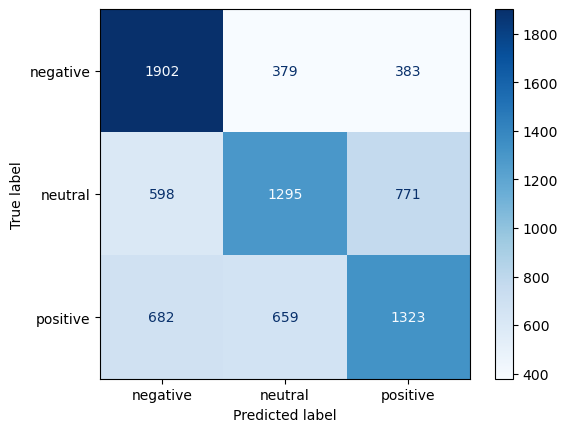

In [110]:
cnf_matrix_rus= confusion_matrix(y_undersamp, pred_rus) # assign what to use in plot
disp_rus = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rus, display_labels=baseline_model_rus.classes_) # create plot
disp_smote_2.plot(cmap=plt.cm.Blues) # output

In [111]:
get_metrics(y_undersamp, pred_rus) # custom function

accuracy: 0.5763888888888888
precision: 0.5767820381600904
recall: 0.576388888888889
f1 score: 0.573973901196452


## Random Under Sampler 2.0
Just like with `SMOTE`, allowing `RandomUnderSampler` to do whatever it wants is not recommended. This time it completely reduced the majority classes down to the minority. In the next run, we will control how much it undersamples.

In [112]:
samp_strat_under = {'neutral' : 2009, 'positive' : 1122, 'negative' : 288} # assign how much to undersample

In [113]:
rus_2 = RandomUnderSampler(random_state = seed, sampling_strategy = samp_strat_under) # assign `RandomUnderSampler` to variable with above cell added

In [114]:
x_rus_2, y_rus_2 = rus_2.fit_resample(tf_vector_xt, y_train) # use sampler on data

In [115]:
y_rus_2.value_counts() # proof `RandomUnderSampler` worked 

emotion
neutral     2009
positive    1122
negative     288
Name: count, dtype: int64

In [116]:
y_train.value_counts() # compare to above cell

emotion
neutral     2664
positive    1516
negative     288
Name: count, dtype: int64

In [117]:
baseline_model_rus_2 = MultinomialNB() # assign `MultinomialNB` to variable

In [118]:
baseline_cv_rus = cross_val_score(baseline_model_rus_2, x_rus_2, y_rus_2) # get cross val score

In [119]:
baseline_cv_rus # cross val score

array([0.61403509, 0.60964912, 0.60964912, 0.60526316, 0.62079063])

In [120]:
baseline_model_rus_2.fit(x_rus_2, y_rus_2) # use data with model

MultinomialNB()

In [121]:
pred_rus_2 = baseline_model_rus.predict(x_rus_2) # get predictions

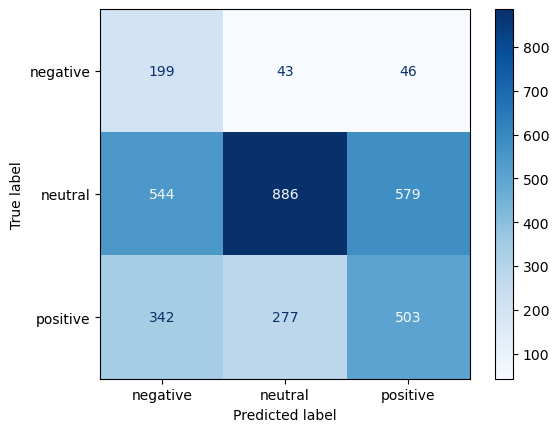

In [122]:
cnf_matrix_rus_2= confusion_matrix(y_rus_2, pred_rus_2) #assign what to use in plot
disp_rus_2 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_rus_2, display_labels=baseline_model_rus_2.classes_) # crate plot
disp_rus_2.plot(cmap=plt.cm.Blues) # output

In [123]:
get_metrics(y_rus_2, pred_rus_2) # custom function

accuracy: 0.46446329336063175
precision: 0.4546640524106489
recall: 0.5267647493833699
f1 score: 0.42938456737193764


## GridsearchCV and Pipeline
Here we weill use `GridsearchCV` and `Pipeline` to speed up the modeling precess and exhaustivly search certain hyper parameters.

In [124]:
rus_3 = RandomUnderSampler(random_state = seed, sampling_strategy = samp_strat_under) # asssign `RandomUnderSampler` to variable

In [125]:
tfidf = TfidfVectorizer(lowercase = False) # assign `fidfVectorizer` to variable

In [126]:
x_under, y_under = rus_3.fit_resample(x_train, y_train) # use undersampler

In [127]:
x_under_flat = [' '.join(doc) for doc in x_under['text_lemmatized']] # flatten data

In [128]:
# this cell creates a pipeline, which essentialy is a set of code to be used in a specific order, and a gridsearch, which searches a set amout of 
# parameters to find the best

pipe = Pipeline([('tf', TfidfVectorizer(lowercase = False)),
                 ('mn' , MultinomialNB())])

params = [{
    'tf__max_features' : (50, 100, 200, 500, 1000, 2000, 3000, 4000)}]

grid = GridSearchCV(pipe, params)

In [129]:
grid.fit(x_under_flat, y_under) # use gridsearch and pipeline on data

GridSearchCV(estimator=Pipeline(steps=[('tf', TfidfVectorizer(lowercase=False)),
                                       ('mn', MultinomialNB())]),
             param_grid=[{'tf__max_features': (50, 100, 200, 500, 1000, 2000,
                                               3000, 4000)}])

In [130]:
grid.best_params_ # output the best parameter

{'tf__max_features': 1000}

In [131]:
pipe_2 = Pipeline([('tf', TfidfVectorizer(lowercase = False, max_features = 3000))
                 ,('mn' , MultinomialNB())]) # assign a new pipepline with best parameters

In [132]:
pipe_2.fit(x_under_flat, y_under) # use pipeline of data

Pipeline(steps=[('tf', TfidfVectorizer(lowercase=False, max_features=3000)),
                ('mn', MultinomialNB())])

In [133]:
pipe_2_pred = pipe_2.predict(x_under_flat) # make predictions

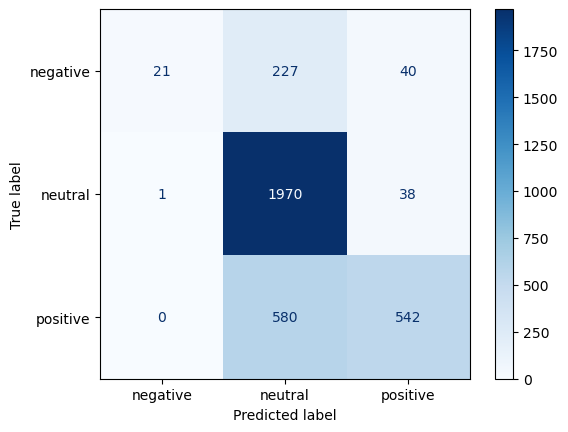

In [134]:
cnf_matrix_pipe_2= confusion_matrix(y_under, pipe_2_pred) # assign what to use in plot
disp_pipe_2 = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_pipe_2, display_labels = pipe_2.classes_) # create plot
disp_pipe_2.plot(cmap=plt.cm.Blues) # output

In [135]:
get_metrics(y_under, pipe_2_pred) # custom function

accuracy: 0.740859900555718
precision: 0.8460458781831347
recall: 0.5121899924049443
f1 score: 0.5269971846239371


# The Final Model
Here is our final model.

In [136]:
x_test_flat = [' '.join(doc) for doc in x_test['text_lemmatized']] # flatten x_test

In [137]:
pipe_2.fit(x_test_flat, y_test) # use model on data

Pipeline(steps=[('tf', TfidfVectorizer(lowercase=False, max_features=3000)),
                ('mn', MultinomialNB())])

In [138]:
pipe_2_pred_test = pipe_2.predict(x_test_flat) # make predictions

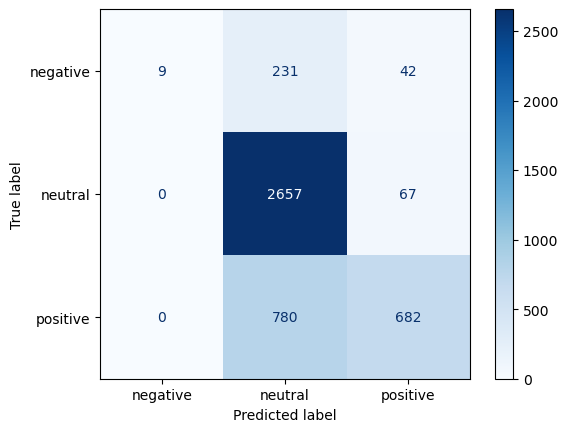

In [139]:
cnf_matrix_pipe_3= confusion_matrix(y_test, pipe_2_pred_test) # assign what to use in plot
disp_pipe_2_test = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_pipe_3, display_labels = pipe_2.classes_) # create plot
disp_pipe_2_test.plot(cmap=plt.cm.Blues) # output

In [140]:
get_metrics(y_test, pipe_2_pred_test) # custom function

accuracy: 0.7493285586392122
precision: 0.8621909008148284
recall: 0.4912676598859025
f1 score: 0.499540787311457


# Conclusion

This conclusion will include three short subsections breaking down the evaluation on the modeling process.

## Evaluation

To evaluate the success of a model, we will be using specific type of metric - _precision_. Precision is a metric associated with _false positives_. False positives was chosen to be the metric to evaluate by because of what we want to model to do, that being classify emotion. To understand the logic behind this, lets dive into confusion metrices and evaluation metrics. Confusion metrices output a plot that shows the _true negatives, true positives, false negatives_ and _false positives_ that a given model made. Each of the metrics has a certain implication. True positives and true negatives are of course what we want the model to have the highest number of predictions in. But no model is perfect. A false negative means the model predicted the feature to be negative, when it was actually positive. In the case of this model, for example, it means it labeled a feature incorrectly, a positive emotion text as a negative one. While this isn't optimal, a more important metric to look at is the opposite, a negative emotion thought to be a positive one. This tweet will most likely never be looked at or analyzed because we think its good, when we're mostly interested in fixing the negatives at this time. To finally test the model, we used `train_test_split` as our validation approach. This splits the data in a way that allows a model to be built on a subset of the data, and tested on another subset of data that has never been seen by the model.

This specific model resulted in an 86.2% precision score. This score represents how often the _false positive_ mistake is made by the model. In this case, it means 86% of the time, the model correctly labeled the positive text as positive text.

## Review

`MultinomialNB` was the only model used here, as it performes well for what we want. Both `SMOTE` and `RandomUnderSampler` were used to try to combat the class imbalace, with `RandomUnderSampler` coming out on top. The metrics for the chosen model are just a few cells up.

## Next Steps

If this model is acceped as sufficeient, the next step will be deployment (and iteratins as needed), as outlined in the CRISP-DM model.